In [2]:
import matplotlib.pyplot as plt
from bitarray import bitarray
from PIL import ImageOps
from PIL import Image
import numpy as np

In [3]:
test_image_RGB = Image.open("Test.jpg")
print(np.array(test_image_RGB))

[[[121 121 113]
  [122 122 114]
  [122 122 114]
  ...
  [ 87 119 157]
  [ 88 118 156]
  [ 85 115 153]]

 [[120 120 112]
  [120 120 112]
  [121 121 113]
  ...
  [ 95 127 165]
  [101 131 167]
  [101 131 167]]

 [[118 118 108]
  [118 118 108]
  [119 119 109]
  ...
  [110 143 178]
  [119 149 183]
  [121 151 185]]

 ...

 [[ 72  98 131]
  [ 72  98 131]
  [ 72  98 131]
  ...
  [ 18  18  20]
  [ 19  19  21]
  [ 20  20  22]]

 [[ 71  97 130]
  [ 71  97 130]
  [ 71  97 130]
  ...
  [ 19  18  23]
  [ 19  18  23]
  [ 18  17  22]]

 [[ 71  97 130]
  [ 71  97 130]
  [ 71  97 130]
  ...
  [ 21  20  25]
  [ 18  17  22]
  [ 16  15  20]]]


In [4]:
# Convert the image in gray scale
test_image_G = test_image_RGB.convert('L')
# Resize the image in 8x8 pixels
test_image_G = test_image_G.resize((256,256))
# Save the image
test_image_G.save("Test_G.jpg")
print(np.array(test_image_G))

contador_aux = 0
for i in np.array(test_image_G):
    for j in i:
        print(str(contador_aux) + ": " + str(j))
        contador_aux += 1

[[120 121 121 ... 115 113 111]
 [119 119 119 ... 127 128 128]
 [117 117 117 ... 146 150 151]
 ...
 [ 94  94  94 ...  18  19  20]
 [ 93  93  93 ...  19  19  18]
 [ 93  93  93 ...  19  17  16]]
0: 120
1: 121
2: 121
3: 121
4: 122
5: 123
6: 123
7: 123
8: 124
9: 124
10: 124
11: 124
12: 126
13: 127
14: 126
15: 126
16: 126
17: 126
18: 127
19: 128
20: 129
21: 130
22: 130
23: 130
24: 130
25: 130
26: 131
27: 132
28: 133
29: 133
30: 135
31: 136
32: 136
33: 137
34: 137
35: 137
36: 138
37: 138
38: 138
39: 138
40: 139
41: 138
42: 138
43: 138
44: 138
45: 139
46: 138
47: 138
48: 138
49: 137
50: 136
51: 137
52: 137
53: 137
54: 137
55: 137
56: 136
57: 136
58: 136
59: 136
60: 136
61: 136
62: 136
63: 135
64: 135
65: 135
66: 135
67: 134
68: 134
69: 133
70: 133
71: 133
72: 132
73: 132
74: 131
75: 131
76: 131
77: 130
78: 130
79: 129
80: 129
81: 129
82: 127
83: 126
84: 125
85: 125
86: 126
87: 126
88: 126
89: 125
90: 124
91: 122
92: 124
93: 123
94: 121
95: 120
96: 116
97: 114
98: 112
99: 111
100: 109
101: 109


In [3]:
test_image_G = Image.open("Test_G.jpg")

# Convert the image data to a numpy array
image_array = np.array(test_image_G)

# Normalize the pixel values to the range [0, 255]
normalized_image = (image_array / 255.0) * 255

# Convert the pixel values to integers
integer_image = normalized_image.astype(np.uint8)

# Flatten the image into a 1D array
flattened_image = integer_image.flatten()

# Create a bitarray for the binary representation of the image data
binary_data = bitarray()
for pixel in flattened_image:
    binary_data.frombytes(bytes([pixel]))
    
# Define the memory width and depth
memory_width = 8                                 # 8 bits per memory location
memory_depth = len(binary_data) // memory_width  # Number of memory locations

# Create the .mif file
with open('image.mif', 'w') as f:
    f.write('DEPTH = {};\n'.format(memory_depth))
    f.write('WIDTH = {};\n'.format(memory_width))
    f.write('ADDRESS_RADIX = DEC;\n')
    f.write('DATA_RADIX = BIN;\n')
    f.write('CONTENT\n')
    f.write('BEGIN\n')

    address = 0
    for i in range(0, len(binary_data), memory_width):
        data = binary_data[i:i+memory_width]
        f.write('{}: {};\n'.format(address, data.to01()))
        address += 1

    f.write('END;\n')

In [5]:
def histogram_equalization(image):
    # Calculate histogram
    histogram = [0] * 256
    for row in image:
        for pixel in row:
            histogram[pixel] += 1


    # Calculate cumulative distribution function (CDF)
    cdf = [0] * 256
    cdf[0] = histogram[0]
    for i in range(1, 256):
        cdf[i] = cdf[i-1] + histogram[i]

    # Calculate equalized histogram
    equalized_histogram = [0] * 256
    for i in range(256):
        equalized_histogram[i] = round((cdf[i] - cdf[0]) / ((image.shape[0] * image.shape[1]) - cdf[0]) * 255)

    # Apply equalization to image
    equalized_image = []
    for row in image:
        equalized_row = []
        for pixel in row:
            equalized_pixel = equalized_histogram[pixel]
            equalized_row.append(equalized_pixel)
        equalized_image.append(equalized_row)

    return equalized_image

newImage_G = histogram_equalization(np.array(test_image_G))


In [6]:
def visualize_image(image):
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

In [7]:
newImage_G = histogram_equalization(np.array(test_image_G))
print(newImage_G)

[[214, 216, 216, 216, 219, 221, 221, 221, 224, 224, 224, 224, 229, 231, 229, 229, 229, 229, 231, 233, 234, 235, 235, 235, 235, 235, 236, 238, 239, 239, 241, 242, 242, 243, 243, 243, 243, 243, 243, 243, 244, 243, 243, 243, 243, 244, 243, 243, 243, 243, 242, 243, 243, 243, 243, 243, 242, 242, 242, 242, 242, 242, 242, 241, 241, 241, 241, 240, 240, 239, 239, 239, 238, 238, 236, 236, 236, 235, 235, 234, 234, 234, 231, 229, 227, 227, 229, 229, 229, 227, 224, 219, 224, 221, 216, 214, 201, 193, 185, 181, 173, 173, 154, 137, 137, 128, 125, 118, 114, 114, 114, 114, 114, 118, 114, 114, 114, 118, 125, 137, 150, 157, 167, 173, 167, 141, 121, 118, 84, 61, 54, 49, 33, 27, 27, 27, 26, 27, 27, 26, 25, 27, 36, 37, 37, 43, 51, 56, 54, 53, 51, 54, 63, 72, 87, 110, 121, 106, 89, 81, 72, 54, 39, 30, 28, 26, 23, 21, 17, 14, 17, 18, 19, 20, 14, 18, 19, 19, 14, 14, 17, 20, 20, 18, 22, 25, 27, 29, 32, 35, 38, 41, 43, 44, 45, 51, 53, 54, 53, 53, 53, 58, 70, 81, 92, 106, 125, 147, 163, 170, 163, 157, 154, 154, 15

In [8]:
print(len(newImage_G))
print(len(newImage_G[0]))

256
256


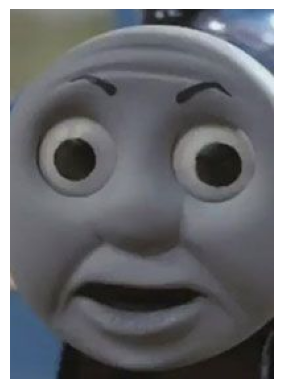

In [9]:
visualize_image(test_image_RGB)

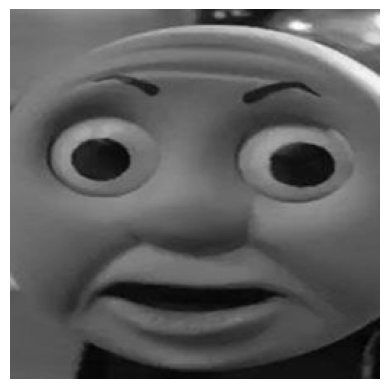

In [10]:
visualize_image(test_image_G)

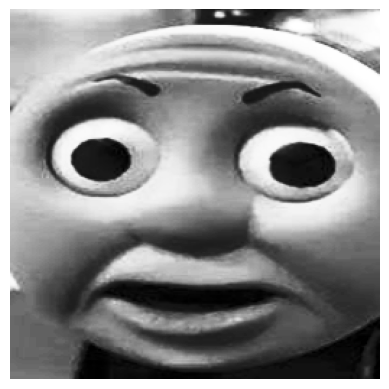

In [11]:
visualize_image(newImage_G)

Epoch 1/10
469/469 [==============================] - 7s 11ms/step - loss: 0.2118 - val_loss: 0.1510
Epoch 2/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1383 - val_loss: 0.1258
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1220 - val_loss: 0.1157
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1136 - val_loss: 0.1092
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1088 - val_loss: 0.1056
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1055 - val_loss: 0.1026
Epoch 7/10
469/469 [==============================] - 6s 13ms/step - loss: 0.1027 - val_loss: 0.1000
Epoch 8/10
469/469 [==============================] - 6s 14ms/step - loss: 0.1009 - val_loss: 0.0987
Epoch 9/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0995 - val_loss: 0.0976
Epoch 10/10
313/313 [==============================] - 1s 2ms/step


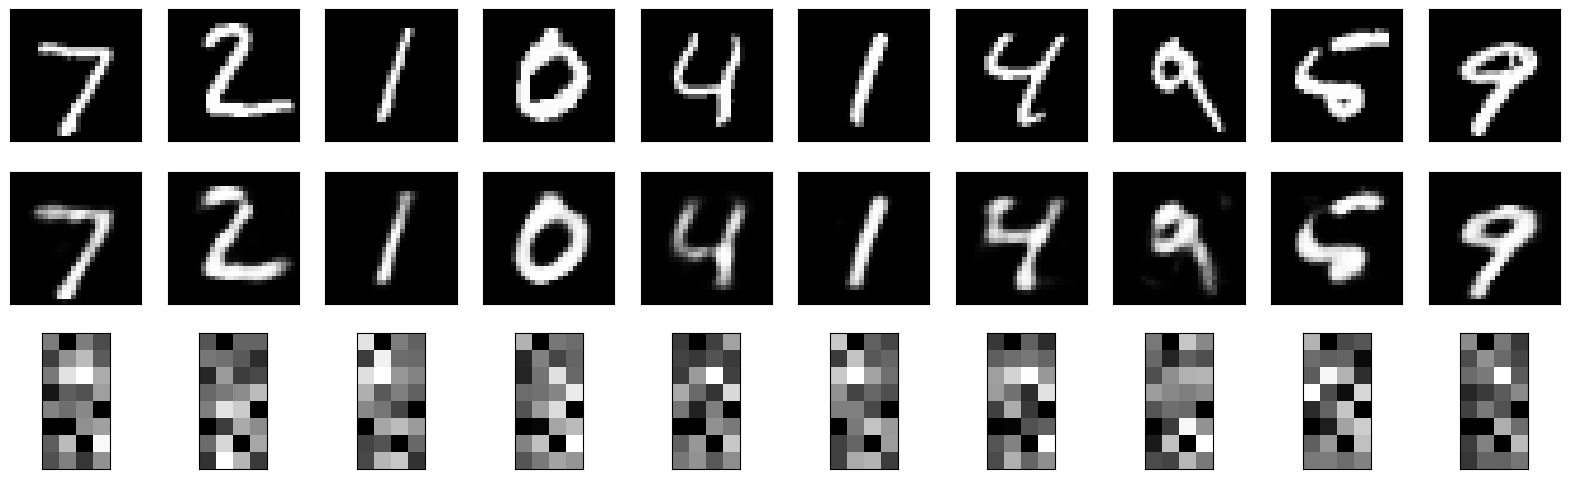

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Cargar los datos de entrenamiento (por ejemplo, MNIST)
(x_train, _), (x_test, _) = mnist.load_data()

# Preprocesar los datos
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Definir la arquitectura del autoencoder
input_img = tf.keras.Input(shape=(28, 28, 1))
encoded = tf.keras.layers.Flatten()(input_img)
encoded = tf.keras.layers.Dense(64, activation='relu')(encoded)
encoded = tf.keras.layers.Dense(32, activation='relu')(encoded)

# Representación latente
latent_representation = encoded

decoded = tf.keras.layers.Dense(64, activation='relu')(encoded)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(decoded)
decoded = tf.keras.layers.Reshape((28, 28, 1))(decoded)

# Construir el modelo del autoencoder
autoencoder = tf.keras.Model(input_img, decoded)

# Compilar el modelo
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Entrenar el autoencoder
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

# Utilizar el autoencoder para reconstruir las imágenes de prueba
reconstructed_imgs = autoencoder.predict(x_test)

# Obtener la representación latente para las imágenes de prueba
latent_representation = tf.keras.Model(input_img, latent_representation)
latent_imgs = latent_representation.predict(x_test)

# Visualizar algunas imágenes originales, reconstruidas y representación latente
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Imagen original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagen reconstruida
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Representación latente
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(latent_imgs[i].reshape(8, 4))  # Asumiendo una representación latente de tamaño 8x4
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [4]:
from PIL import Image
import numpy as np

# Cargar la imagen original
image = Image.open("Test_G.jpg")

# Convertir la imagen en una matriz NumPy
image_array = np.array(image)
# Calcular el histograma de la imagen
histogram, _ = np.histogram(image_array.flatten(), bins=256, range=[0, 256])
# Calcular la función de distribución acumulativa (CDF) del histograma
cdf = histogram.cumsum()
cdf_normalized = cdf * histogram.max() / cdf.max()
# Calcular los nuevos valores de píxel utilizando la ecualización del histograma
image_eq = np.interp(image_array.flatten(), np.arange(0, 256), cdf_normalized)
image_eq = image_eq.reshape(image_array.shape)
# Convertir los valores de píxel a formato hexadecimal
hex_image_array = image_eq.flatten().astype(np.uint8).tolist()
hex_image_data = ['{:02X}'.format(pixel) for pixel in hex_image_array]
with open("image_eq.dat", "w") as f:
    for pixel in hex_image_data:
        f.write(pixel + "\n")


In [ ]:
# Obtener la secuencia de valores de píxeles de la imagen cargada en la FPGA
#image_data = [0, 1, 2, 3, 0, 1, 2, 2, 3, 3, 3]  # Ejemplo de datos de imagen

# Cargar la imagen original
image = Image.open("Test_G.jpg")

# Convertir la imagen en una matriz NumPy
image_array = np.array(image)

# Crear un diccionario para almacenar los contadores de histograma
histogram_counters = {}

# Calcular el histograma
for pixel in image_array:
    if pixel in histogram_counters:
        histogram_counters[pixel] += 1
    else:
        histogram_counters[pixel] = 1

# Escribir los resultados en el archivo .dat
with open("histogram.dat", "w") as f:
    for pixel, count in histogram_counters.items():
        f.write(f"{pixel} {count}\n")


In [6]:
# Cargar la imagen original
image = Image.open("Test_G.jpg")

# Convertir la imagen en una matriz NumPy
image_array = np.array(image)

# Calcular el histograma de la imagen
histogram, _ = np.histogram(image_array.flatten(), bins=256, range=[0, 256])

# Escribir los resultados en el archivo .dat
with open("histogram.dat", "w") as f:
    for i, count in enumerate(histogram):
        f.write(f"{i} {count}\n")

In [7]:
# Import the necessary libraries
import numpy as np

# Cargar la imagen original
image = Image.open("Test_G.jpg")

# Convertir la imagen en una matriz NumPy
image_array = np.array(image)

# Calculate the histogram of the image
histogram = [0] * 256
for row in image_array:
    for pixel in row:
        histogram[pixel] += 1

# Convert the histogram values to hexadecimal instructions
instructions = []
for value in histogram:
    instruction = hex(value)[2:].zfill(8)
    instructions.append(instruction)

# Write the instructions to a .dat file
with open('histogram_instructions.dat', 'w') as f:
    for instruction in instructions:
        f.write(instruction + '\n')


In [ ]:
import numpy as np

# Código para calcular el histograma

# Convertir el histograma a un arreglo de tipo numpy uint32
histogram_array = np.array(histogram, dtype=np.uint32)

# Guardar el arreglo en un archivo .dat en formato hexadecimal
histogram_array.tofile('histogram.dat', sep='', format='%02X')
